# Introduction to Matplotlib

Get straight into plotting data, that's what we're focused on.

Video 0 will be concepts and contain details like anatomy of a figure. The rest of the videos will be pure code based.

0. Concepts in Matplotlib
1. 2 ways of creating plots (pyplot & OO) - use the OO method
2. Plotting data (NumPy arrays), line, scatter, bar, hist, subplots
3. Plotting data directly with Pandas (using the pandas matplotlib wrapper) 
4. Plotting data (pandas DataFrames) with the OO method, line, scatter, bar, hist, subplots
5. Cutomizing your plots, `limits`, `colors`, `styles`, `legends`
6. Saving plots

## 0. Concepts in Matplotlib
* What is Matplotlib?
* Why Matplotlib?
* Anatomy of a figure
* Where does Matplotlib fit into the ecosystem?
    * A Matplotlib workflow

## 1. 2 ways of creating plots
- `pyplot()`
- `OO` - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html (this the new page focus on the stable version)
- Matplotlib recommends the OO API
    * https://matplotlib.org/stable/tutorials/introductory/pyplot.html (this is the latest intro to stable version)
    * https://matplotlib.org/stable/tutorials/introductory/lifecycle.html (the latest one)
    
Start by importing `Matplotlib` and setting up the `%matplotlib inline` magic command.
The magic command will tell interpreter to show the Matplotlib object in the notebook and not just reference addresses.

WARNING: YOU NEED TO RESART AND RERUN ALL CODES JUST IN CASE THE SYSTEM DOES NOT RECOGNIZED THE ACTIVATION AND IMPORT OF MATPLOTLIB.

In [1]:
# Import matplotlib and setup the figures to display within the notebook
%matplotlib inline
# here is explanation on the %matplotlib magic fucntion: https://ipython.readthedocs.io/en/stable/interactive/plotting.html
# jsut ctrl+f find the 'inline' keyword.
# THIS WILL MAKE ALL MATPLOTLIB PLOTS AND FINCTIONS TO APPEAR WITHIN THE JUPYTER NOTEBOOK.

import matplotlib.pyplot as plt

[]

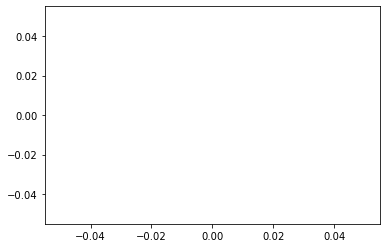

In [2]:
# Create a simple plot, without the semi-colon
plt.plot()

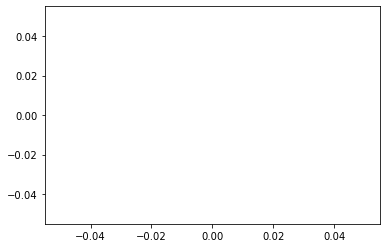

In [3]:
# With the semi-colon
plt.plot();
# same thing but without [] in output. []

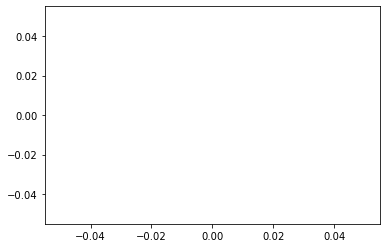

In [4]:
# You could use plt.show() if you want this is the same as the semi colon in the end like previous line
plt.plot()
plt.show()

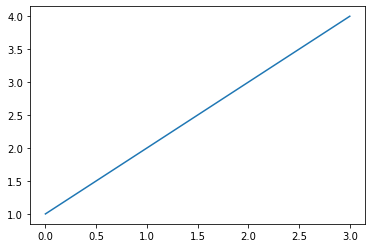

In [5]:
# Let's add some data
plt.plot([1, 2, 3, 4])

In [6]:
# Create some data
x1 = [1, 2, 3, 4]
y = [11, 22, 33, 44]

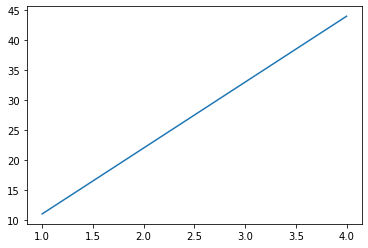

In [7]:
# With a semi-colon and now a y value
plt.plot(x1, y);
# this is called static matplotlib plotting. 
# pyplot is less flexible compared to object oriented API. So far we use the pyplot API thus less flexible. 

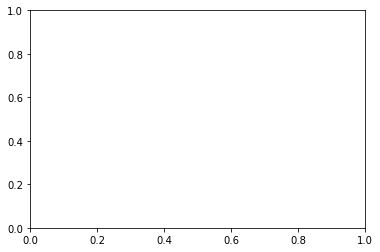

In [8]:
# Creating a plot with the OO verison, confusing way first (is this must be verbose and exactly the same command?)
fig = plt.figure()
ax = fig.add_subplot() #add some axes
plt.show()

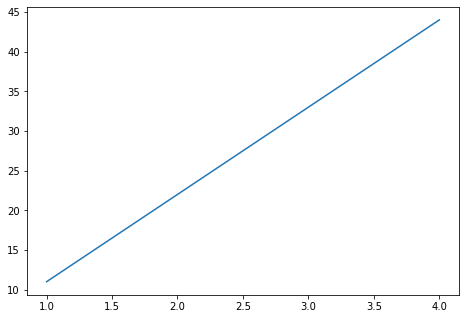

In [9]:
# Confusing #2 this is confusing indeed. the add axes method is hard to convey 
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x1, y)
plt.show()

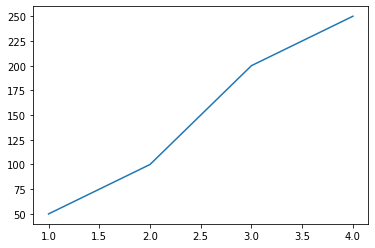

In [10]:
# Easier and more robust going forward (what we're going to use) This is called 3rd methid in the session
fig, ax = plt.subplots()
ax.plot(x1, [50, 100, 200, 250]); #the semi colon is to substitute plt.show()

### -> Show figure/plot anatomy here <-
![matplotlib anatomy of figure][../images/matplotlib-anatomy-of-a-plot.png]

In [11]:
# This is where the object orientated name comes from 
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

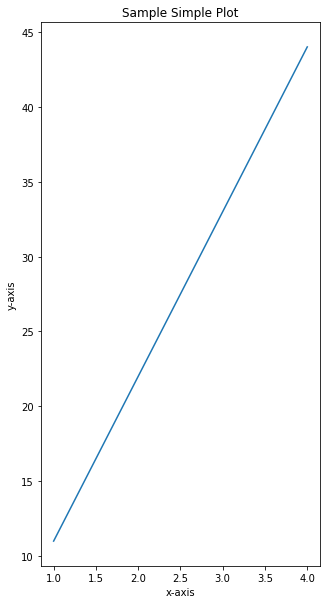

In [12]:
# A matplotlib workflow

# 0. Import and get matplotlib ready
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
# in this example this is simple
x2 = [1, 2, 3, 4]
y2 = [11, 22, 33, 44]

# 2. Setup plot 
# this is using the OO paradigm mode. 
fig, ax = plt.subplots(figsize=(5,10))
# figsize this is parameters read the docs. 

# 3. Plot data
ax.plot(x2, y2)

# 4. Customize plot
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & show
fig.savefig("../images/simple-plot.png")

Text(0.5, 1.0, 'axis trial 2')

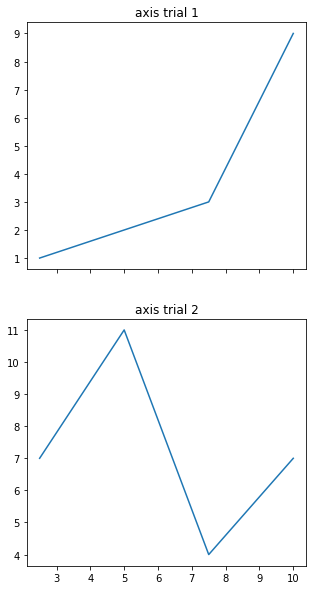

In [13]:
# Trial in making my own plots
# prepare my data
import numpy as np 
yt1 = np.random.randint(0, 10, 4)
xtr = [2.5, 5.0, 7.5, 10]
yt2 = np.random.randint(0,20,4)

# setup the figure
figtrial, (axtrial1, axtrial2) = plt.subplots(2, 1, sharex=True, figsize=(5,10))
axtrial1.plot(xtr, yt1)
axtrial2.plot(xtr, yt2)
axtrial1.set_title("axis trial 1")
axtrial2.set_title("axis trial 2")

# NOTE: BE CAREFUL WHEN READING DOCS
The plt.subplots will return two objects: 
- Figure which is contained in the figtrial variable 
- Axes which is contained in the axtrial1 and axtrial2 varaibles.
Thus in order to make certain size of figures afterwards or modify its value is not possible. 
Why? since the figure already being instantiated in the subplots() calls. 

Therefore, if you want to chagne the figure dimension you must put the dimension as parameters and arguments in the subplots() function

## 2. Making the most common type of plots using NumPy arrays
Most of figuring out what kind of plot to use is getting a feel for the data, then see what suits it best.

Matplotlib visualizations are built off NumPy arrays. So in this section we'll build some of the most common types of plots using NumPy arrays.

- `line` <- this is the basis
- `scatter`
- `bar`
- `hist`
- `subplots()`

To make sure we have access to NumPy, we'll import it as `np`.

### Line

Line is the default type of visualization in Matplotlib. Usually, unless specified otherwise, your plots will start out as lines.

In [14]:
# Create an array
# WARNING: THIS IS WHY X VALUE ERROR ABOVE!! I change the variable name to x3 to be safe!!
x3 = np.linspace(0, 10, 100)
x3 [:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

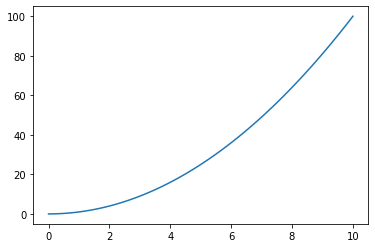

In [15]:
# The default plot is line
fig, ax = plt.subplots()
ax.plot(x3, x3**2);

### Scatter

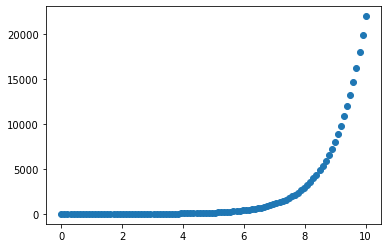

In [16]:
# Need to recreate our figure and axis instances when we want a new figure
fig, ax = plt.subplots()
ax.scatter(x3, np.exp(x3));

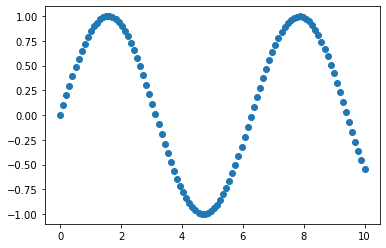

In [17]:
fig, ax = plt.subplots()
ax.scatter(x3, np.sin(x3));

### Bar
* Vertical
* Horizontal

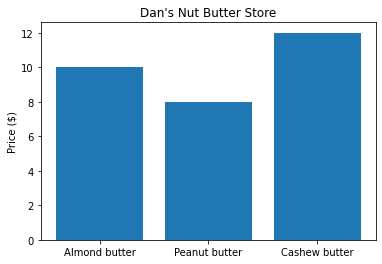

In [18]:
# You can make plots from a dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)"); #<-- THIS IS TO OMIT THE ADDRESS REFRENCE
#  WARNING YOU CANNOT USE AX.SHOW() OR FIG.SHOW() JUST USE ';'
# nut_butter_prices.keys() is a dict python built in function returns list of keys
# nut_butter_prices.values() built in python function returns list of dict values 


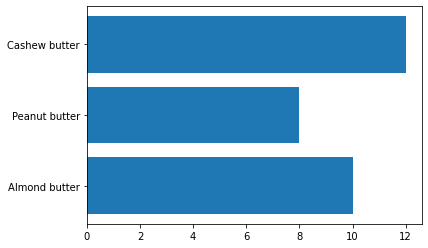

In [19]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));
# this is is horizontal rather than vertical bar chart!

### Histogram (hist)

* Could show image of normal distribution here

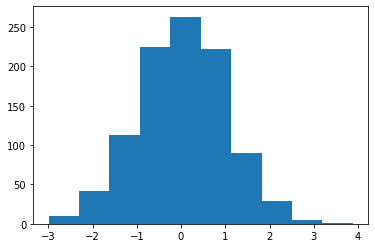

In [20]:
# Make some data from a normal distribution
x_rand = np.random.randn(1000) # pulls data from a normal distribution

fig, ax = plt.subplots()
ax.hist(x_rand);

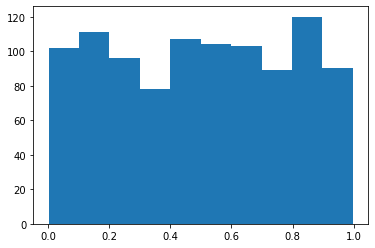

In [21]:
x_rand_non_normal = np.random.random(1000) # random data from random distribution

fig, ax = plt.subplots()
ax.hist(x_rand_non_normal); 
# this is not really not normal.

### Subplots
* Multiple plots on one figure
https://matplotlib.org/3.1.1/gallery/recipes/create_subplots.html

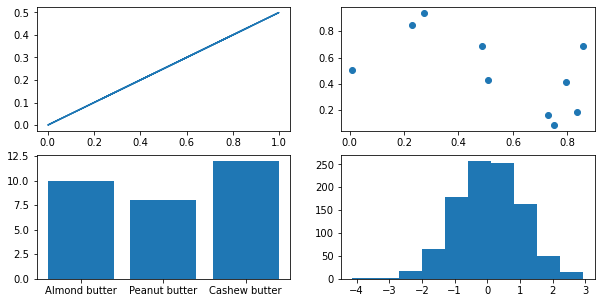

In [22]:
# Option 1: Create multiple subplots here we got 4 plots with ax and ax2 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(10, 5))

# Plot data to each axis
ax1.plot(x_rand_non_normal, x_rand_non_normal/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

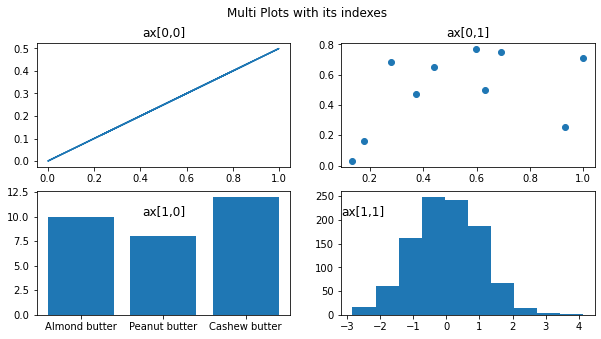

In [25]:
# Option 2: Create multiple subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Index to plot data : this is changing the ax 1 with ax[0,0] and so on
fig.suptitle('Multi Plots with its indexes');
ax[0, 0].plot(x_rand_non_normal, x_rand_non_normal/2);
ax[0,0].set_title('ax[0,0]');
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[0,1].set_title('ax[0,1]');
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1,0].set_title('ax[1,0]', y=.75);
ax[1, 1].hist(np.random.randn(1000));
ax[1,1].set_title('ax[1,1]', loc='left', y=.75);

## 3. Plotting data directly with pandas
This section uses the pandas `pd.plot()` method on a DataFrame to plot columns directly.

* https://datatofish.com/plot-dataframe-pandas/
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

* `line`
* `scatter`
* `bar`
* `hist`
* `df.plot(subplots=True, figsize=(6, 6))`

To plot data with pandas, we first have to import it as `pd`.

In [26]:
import pandas as pd

Now we need some data to check out.

In [27]:
# Let's import the car_sales dataset
car_sales = pd.read_csv("../data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


### Line
* Concept
* DataFrame

Often, reading things won't make sense. Practice writing code for yourself, get it out of the docs and into your workspace. See what happens when you run it.

Let's start with trying to replicate the pandas visualization documents.

In [28]:
# Start with some dummy data
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2020', periods=1000))
ts

2020-01-01   -0.311133
2020-01-02    0.457867
2020-01-03   -0.594120
2020-01-04    0.045671
2020-01-05    0.777202
                ...   
2022-09-22    1.846031
2022-09-23    0.112740
2022-09-24   -1.088046
2022-09-25   -1.333076
2022-09-26   -0.630848
Freq: D, Length: 1000, dtype: float64

In [32]:
# What does cumsum() do? cumulative sums of data frame of the data frame
# what is cumulative sum?? 
ts.cumsum()

2020-01-01    -0.311133
2020-01-02     0.146734
2020-01-03    -0.447386
2020-01-04    -0.401715
2020-01-05     0.375487
                ...    
2022-09-22   -60.321729
2022-09-23   -60.208989
2022-09-24   -61.297035
2022-09-25   -62.630111
2022-09-26   -63.260959
Freq: D, Length: 1000, dtype: float64

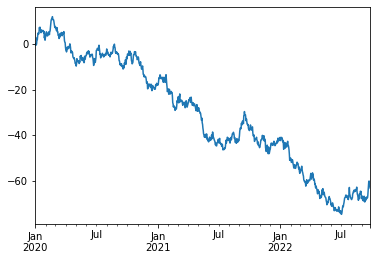

In [34]:
ts.cumsum().plot();

### Working with actual data

Let's do a little data manipulation on our `car_sales` DataFrame.

In [36]:
# Remove price column symbols
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '',regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [37]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [41]:
# Add a date column
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total Sales,Sale Date
0,Toyota,White,150043,4,4000,4000,2020-01-01
1,Honda,Red,87899,4,5000,9000,2020-01-02
2,Toyota,Blue,32549,3,7000,16000,2020-01-03
3,BMW,Black,11179,5,22000,38000,2020-01-04
4,Nissan,White,213095,4,3500,41500,2020-01-05
5,Toyota,Green,99213,4,4500,46000,2020-01-06
6,Honda,Blue,45698,4,7500,53500,2020-01-07
7,Honda,Blue,54738,4,7000,60500,2020-01-08
8,Toyota,White,60000,4,6250,66750,2020-01-09
9,Nissan,White,31600,4,9700,76450,2020-01-10


In [42]:
# Make total sales column (doesn't work, adds as string)
#car_sales["Total Sales"] = car_sales["Price"].cumsum()

# Oops... want them as int's not string
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total Sales,Sale Date
0,Toyota,White,150043,4,4000,4000,2020-01-01
1,Honda,Red,87899,4,5000,9000,2020-01-02
2,Toyota,Blue,32549,3,7000,16000,2020-01-03
3,BMW,Black,11179,5,22000,38000,2020-01-04
4,Nissan,White,213095,4,3500,41500,2020-01-05
5,Toyota,Green,99213,4,4500,46000,2020-01-06
6,Honda,Blue,45698,4,7500,53500,2020-01-07
7,Honda,Blue,54738,4,7000,60500,2020-01-08
8,Toyota,White,60000,4,6250,66750,2020-01-09
9,Nissan,White,31600,4,9700,76450,2020-01-10


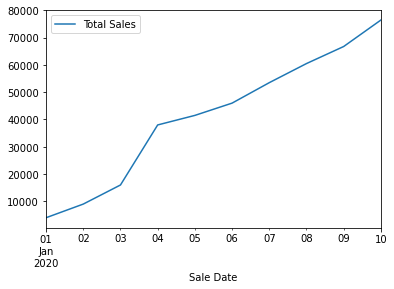

In [43]:
car_sales.plot(x='Sale Date', y='Total Sales');

### Scatter
* Concept
* DataFrame

<AxesSubplot:xlabel='Odometer (KM)', ylabel='Price'>

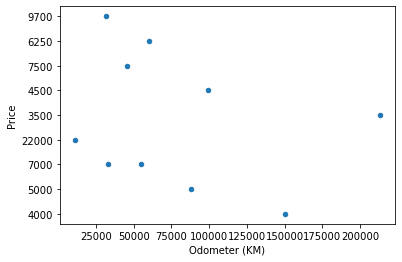

In [44]:
# Doesn't work
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

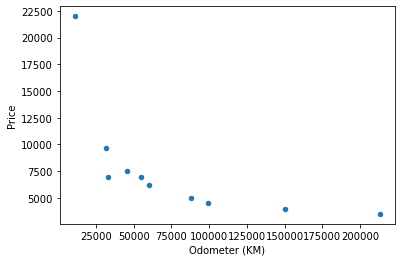

In [45]:
# Convert Price to int
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer (KM)", y="Price", kind='scatter');

### Bar
* Concept
* DataFrame

In [ ]:
x = np.random.rand(10, 4)
x

In [ ]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

In [ ]:
df.plot.bar();

In [ ]:
# Can do the same thing with 'kind' keyword
df.plot(kind='bar');

In [ ]:
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar');

### Histograms


In [ ]:
car_sales["Odometer (KM)"].plot.hist();

In [ ]:
car_sales["Odometer (KM)"].plot(kind="hist");

In [ ]:
# Default number of bins is 10 
car_sales["Odometer (KM)"].plot.hist(bins=20);

In [ ]:
car_sales["Price"].plot.hist(bins=10);

In [ ]:
# Let's try with another dataset
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

In [ ]:
heart_disease["age"].plot.hist(bins=50);

### Subplots
* Concept
* DataFrame

In [ ]:
heart_disease.head()

In [ ]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

## 4. Plotting with pandas using the OO method 

For more complicated plots, you'll want to use the OO method.

In [ ]:
# Perform data analysis on patients over 50
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

In [ ]:
over_50.plot(kind='scatter', 
             x='age', 
             y='chol', 
             c='target', 
             figsize=(10, 6));

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter', 
             x="age", 
             y="chol", 
             c='target', 
             ax=ax);
ax.set_xlim([45, 100]);

In [ ]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target");

What if we wanted a horizontal line going across with the mean of `heart_disease["chol"]`?

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axhline.html

In [ ]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax.axhline(over_50["chol"].mean(),
           linestyle="--");

### Adding another plot to existing styled one

In [ ]:
# Setup plot (2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2, # 2 rows
                               ncols=1, 
                               sharex=True, 
                               figsize=(10, 8))

# Add data for ax0
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"])
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")
ax0.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")


# Add data for ax1
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")
ax1.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

## 5. Customizing your plots

* `limits (xlim, ylim)`, `colors`, `styles`, `legends`

### Style

In [ ]:
plt.style.available

In [ ]:
# Plot before changing style
car_sales["Price"].plot();

In [ ]:
# Change the style... 
plt.style.use('seaborn-whitegrid')

In [ ]:
car_sales["Price"].plot();

In [ ]:
plt.style.use('seaborn')

In [ ]:
car_sales["Price"].plot();

In [ ]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [ ]:
plt.style.use('ggplot')

In [ ]:
car_sales["Price"].plot.hist();

### Changing the title, legend, axes 

In [ ]:
x = np.random.randn(10, 4)
x

In [ ]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

In [ ]:
ax = df.plot(kind='bar')
type(ax)

In [ ]:
ax = df.plot(kind='bar')
ax.set(title="Random Number Bar Graph from DataFrame", 
       xlabel="Row number", 
       ylabel="Random number")
ax.legend().set_visible(True)

### Changing the cmap

In [ ]:
plt.style.use('seaborn-whitegrid')

In [ ]:
# No cmap change
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.axhline(y=over_50["chol"].mean(), 
           c='b', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), title="Target");

In [ ]:
# Change cmap and horizontal line to be a different colour
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"], 
                     cmap="winter")
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")
ax.axhline(y=over_50["chol"].mean(), 
           color='r', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), title="Target");

### Changing the xlim & ylim

In [ ]:
## Before the change (we've had color updates)

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

In [ ]:
## After adding in different x & y limitations

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Set the x axis
ax0.set_xlim([50, 80])

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

## 6. Saving plots
* Saving plots to images using `figsave()`

If you're doing something like this often, to save writing excess code, you might put it into a function.

A function which follows the Matplotlib workflow.

In [ ]:
# Axis 0, 1 (row 0, column 0)
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Set the x axis
ax0.set_xlim([50, 80])

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

In [ ]:
# Check the supported filetypes
fig.canvas.get_supported_filetypes()

In [ ]:
fig

In [ ]:
# Save the file
fig.savefig("../images/heart-disease-analysis.png")

In [ ]:
# Resets figure
fig, ax = plt.subplots()

In [ ]:
# Potential function

def plotting_workflow(data):
    # 1. Manipulate data
    
    # 2. Create plot
    
    # 3. Plot data
    
    # 4. Customize plot
    
    # 5. Save plot
    
    # 6. Return plot
    
    return plot